<a href="https://colab.research.google.com/github/rickylukman/Machine-Learning/blob/master/Machine_Learning_Clustering_Alvianda_Ricky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
import pandas as pd
df=pd.read_csv('gdrive/My Drive/used_cars_olah.csv')
df.shape

(20001, 12)

In [0]:
df.head()

,Unnamed: 0,price,year,manufacturer,model,condition,fuel,title_status,transmission,drive,paint_color,state
0,0,0.000015,0.922330,0.974359,0.530292,0.0,0.5,0.0,0.5,0.0,0.000000,0.0
1,1,0.000000,0.961165,0.307692,0.425778,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
2,2,0.000040,0.951456,0.333333,0.792904,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
3,3,0.000000,0.961165,0.307692,0.425778,0.0,0.5,0.0,0.0,0.0,0.909091,0.0
4,4,0.000043,0.980583,0.307692,0.444847,0.0,0.0,0.0,0.0,0.0,0.909091,0.0


Ambil 2 kolom untuk clustering

In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [29]:
#manufacturer ,paint color
print(df.iloc[:, [3, 10]])
cluster = df.iloc[:, [3, 10]].values

       manufacturer  paint_color
0          0.974359     0.000000
1          0.307692     0.909091
2          0.333333     0.909091
3          0.307692     0.909091
4          0.307692     0.909091
...             ...          ...
19996      0.820513     0.454545
19997      0.743590     0.909091
19998      0.487179     0.909091
19999      0.948718     0.909091
20000      0.948718     0.000000

[20001 rows x 2 columns]


Cari nilai K menggunakan elbow method

In [0]:
from matplotlib import pyplot as plt
import numpy as np

distortions = []
K = range(1,10)
for i in K:
  kmeanModel = KMeans(n_clusters=i).fit(cluster)
  kmeanModel.fit(cluster)
  distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) /cluster.shape[0] ) 

<function matplotlib.pyplot.show>

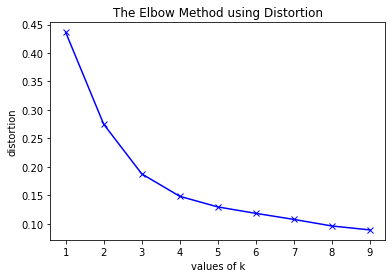

<Figure size 360x360 with 0 Axes>

In [31]:
#plot elbow method
plt.plot(K, distortions, 'bx-')
plt.xlabel('values of k')
plt.ylabel('distortion')
plt.title('The Elbow Method using Distortion')
fig = plt.figure(figsize=(5, 5))
plt.show


In [25]:
cluster.shape

(20001, 2)

In [0]:
# Inisiasi nilai K
K = 3

Plot sebaran data

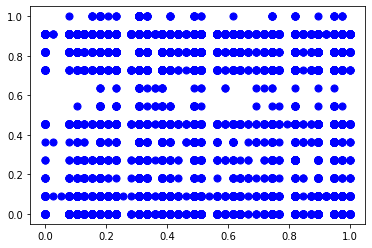

In [74]:
import matplotlib.pyplot as plt
plt.scatter(cluster[ : , 0], cluster[ :, 1], s = 50, c = 'b')
plt.show()

Buat centroid random

In [0]:
# Inisiasi kolom yang dipakai 
dx = cluster[ : , 0].copy()
dy = cluster[ : , 1].copy()

In [0]:
# Menggabungkan data kolom manufacture dan paint_color
titik = list(zip(dx, dy))

In [0]:
import random

In [0]:
def cekcentroid(titik,centroid1,centroid2):
  centro_temp = random.choice(titik)
  for i in titik:
    # untuk random centroid 2
    if (i != centroid1) and (centroid2==0):
      return i
    # untuk random centroid 3
    elif (i != centroid1) and (i != centroid2):
      return i  

In [0]:
centroid1 = random.choice(titik)
centroid2 = cekcentroid(titik,centroid1,0)
centroid3 = cekcentroid(titik,centroid1,centroid2)

In [80]:
centroid1, centroid2, centroid3

((0.9743589743589745, 0.4545454545454546),
 (0.9743589743589745, 0.0),
 (0.3076923076923077, 0.9090909090909092))

Text(0, 0.5, 'paint_color')

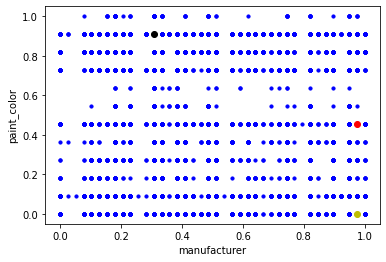

In [86]:
plt.scatter(dx, dy, s = 10, c = 'b')
plt.scatter(centroid1[0], centroid1[1], c='r')
plt.scatter(centroid2[0], centroid2[1], c='y')
plt.scatter(centroid3[0], centroid3[1], c='black')
plt.xlabel('manufacturer')
plt.ylabel('paint_color')

Perulangan untuk centroid dengan euclidian

In [0]:
import math
#clus1 = centroid1, clus2 = centroid2, clus3 = centroid3
clus1, clus2, clus3 = [], [], []

In [0]:
while True:
  # Proses menklusterkan
  for i in titik:
    # Menghitung jarak 2 titik dengan Euclidian Distance
    #jarak antara titik i dengan centroid pertama
    hitung1 = math.sqrt((titik[i][0] - centroid1[0])**2 + (titik[i][1] - centroid1[1])**2)
    #jarak antara titik i dengan centroid kedua
    hitung2 = math.sqrt((titik[i][0] - centroid2[0])**2 + (titik[i][1] - centroid2[1])**2)
    #jarak antara titik i dengan centroid ketiga
    hitung3 = = math.sqrt((titik[i][0] - centroid3[0])**2 + (titik[i]][1] - centroid3[1])**2)

    if min(hitung1, hitung2, hitung3) == hitung1:
      clus1.append(point[i])
    elif min(hitung1, hitung2, hitung3) == hitung2:
      clus2.append(point[i])
    elif min(hitung1, hitung2, hitung3) == hitung3:
      clus3.append(point[i])
  #endfor

  # a,b,c untuk menyimpan centroid sebelumnya
  a = centroid1
  b = centroid2
  c = centroid3
  